In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

np.random.seed(42)
random_state = np.random.get_state()

In [2]:
# 0 is the left terminal state
# 6 is the right terminal state
# 1 ... 5 represents A ... E
VALUES = np.zeros(7)
VALUES[1:6] = 0.5

# For convenience, we assume all rewards are 0
# and the left terminal state has value 0, the right terminal state has value 1
VALUES[6] = 1

# set up the true state values
TRUE_VALUE = np.zeros(7)
TRUE_VALUE[1:6] = np.arange(1, 6) / 6.0
TRUE_VALUE[6] = 1

ACTION_LEFT = 0
ACTION_RIGHT = 1

In [3]:
# @values: current states value, will be updated if @batch is False
# @alpha: step size
def temporal_difference(values, alpha=0.1):
    state = 3
    trajectory = [state]
    rewards = [0]
    
    while True:
        old_state = state
        if np.random.binomial(1, 0.5) == ACTION_LEFT:
            state -= 1
        else:
            state += 1
        
        # Assume all rewards are 0
        reward = 0
        trajectory.append(state)
        
        # TD update
        values[old_state] = values[old_state] + alpha * (reward + values[state] - values[old_state])

        if state in (0, 6):
            break
        rewards.append(reward)
    
    return trajectory, rewards

In [4]:
# Example 6.2 left
def compute_state_value():
    np.random.set_state(random_state)
    
    episodes = [0, 1, 10, 100]
    current_values = np.copy(VALUES)
    for i in range(episodes[-1] + 1):
        if i in episodes:
            plt.plot(current_values, label="{} episodes".format(i))
        temporal_difference(current_values)
    plt.plot(TRUE_VALUE, label="true values")
    plt.xlabel("state")
    plt.ylabel("extimated value")
    plt.legend()

In [5]:
# @values: current states value, will be updated if @batch is False
# @alpha: step size
def monte_carlo(values, alpha=0.1):
    state = 3
    trajectory = [state]

    # if end up with left terminal state, all returns are 0
    # if end up with right terminal state, all returns are 1
    while True:
        if np.random.binomial(1, 0.5) == ACTION_LEFT:
            state -= 1
        else:
            state += 1
        trajectory.append(state)

        if state == 6:
            returns = 1.0
            break
        elif state == 0:
            returns = 0.0
            break
    
    for state_ in trajectory[:-1]:
        # MC update
        values[state_] = values[state_] + alpha * (returns - values[state_])
    
    return trajectory, [returns] * (len(trajectory) - 1)

In [6]:
# Example 6.2 right
def rms_error():
    # Same alpha value can appear in both arrays
    td_alphas = [0.15, 0.1, 0.05]
    mc_alphas = [0.01, 0.02, 0.03, 0.04]
    episodes = 100 + 1
    runs = 100

    for i, alpha in enumerate(td_alphas + mc_alphas):
        np.random.set_state(random_state)

        total_errors = np.zeros(episodes)
        if i < len(td_alphas):
            method = "TD"
            linestyle = "solid"
        else:
            method = "MC"
            linestyle = "dashdot"
        
        for r in tqdm(range(runs)):
            errors = []
            current_values = np.copy(VALUES)
            for i in range(0, episodes):
                errors.append(np.sqrt(np.sum(np.power(TRUE_VALUE - current_values, 2)) / 5.0))
                if method == "TD":
                    temporal_difference(current_values, alpha=alpha)
                else:
                    monte_carlo(current_values, alpha=alpha)
            total_errors += np.asarray(errors)
        total_errors /= runs
        plt.plot(total_errors, linestyle=linestyle, label="{}, alpha = {:.02f}".format(method, alpha))
    plt.xlabel("episodes")
    plt.ylabel("RMS")
    plt.legend()

In [7]:
def example_6_2():
    plt.figure(figsize=(10, 20))
    plt.subplot(2, 1, 1)
    compute_state_value()

    plt.subplot(2, 1, 2)
    rms_error()

    plt.tight_layout()
    plt.show()

100%|██████████| 100/100 [00:00<00:00, 106.10it/s]


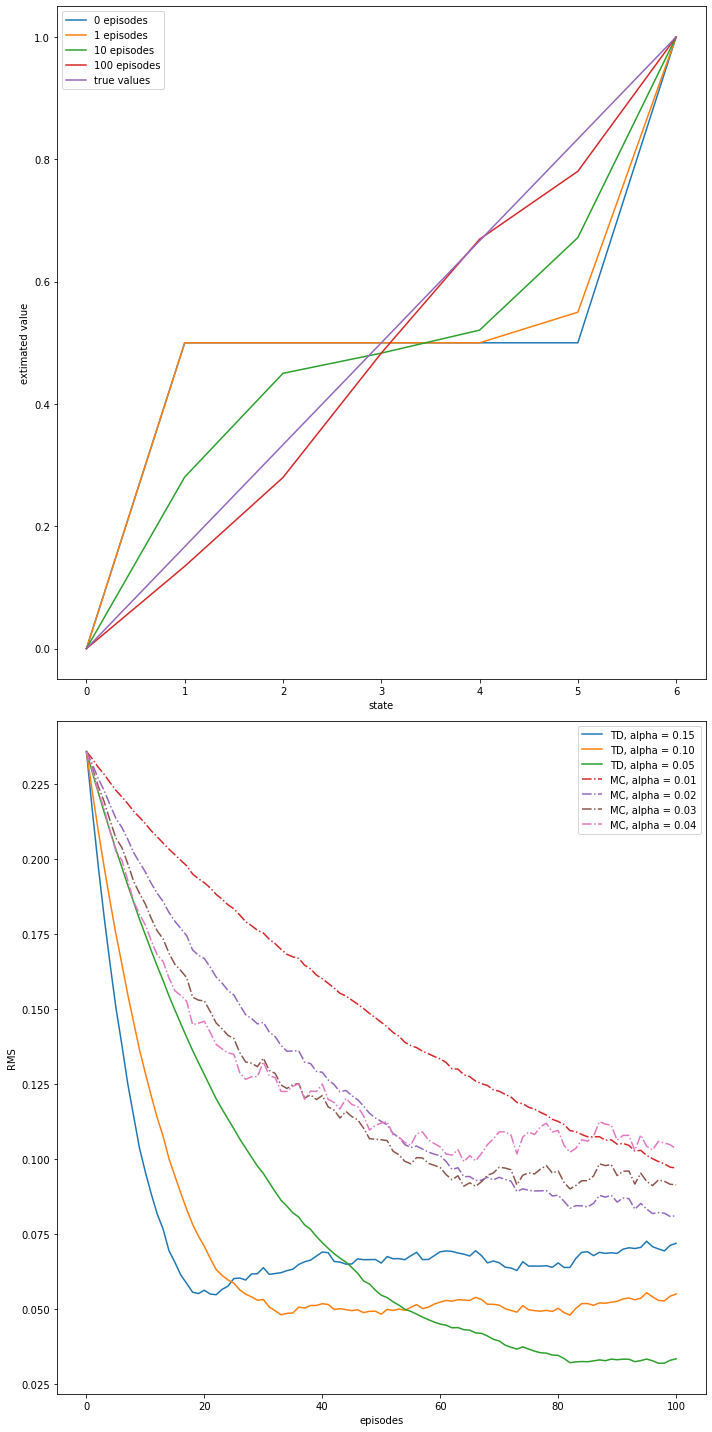

In [8]:
example_6_2()